In [1]:
# These two lines allow for the notebook to automatically update to use the most
# up-to-date versions of the code being imported
%load_ext autoreload
%autoreload 2

# General important stuff
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
from data_analysis.systems.control_systems import *
# plt.style.available
plt.style.use('notebook')
%matplotlib inline

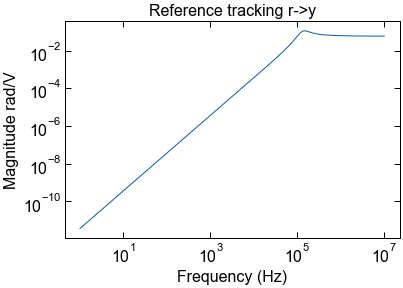

In [2]:
# architechture
# r ---> D1 ----------------> dphi
#        |              |
#       VCO <-- PI <-- D2
# assume both r and VCO have the same noise spectrum

K = 2*np.pi*30e6 # VCO gain 30MHz/V [Hz/V]
BW_vco = 1e6     # VCO BW 1MHz
Dphi = 0.06      # V/rad
S_pd = 8e-14     # photocetector noise [rad^2/Hz]


D1 = ControlModule(sys_ref = 1, unit_in = 'rad', unit_out = 'rad')

D2 = ControlModule(sys_ref = Dphi, unit_in = 'rad', unit_out = 'V')
D2.output_noise = np.ones(len(D2.freqx))*8e-14

s = ctrl.tf('s')
sys = 0.05*(1 + 2*np.pi*1.8e5/s)
servo = ControlModule(sys_ref = sys, unit_in = 'V', unit_out = 'V')
servo.output_noise = np.ones(len(servo.freqx))*1e-14 # 1e-14 V^2/Hz

sys = K/s/(1+s/(2*np.pi*BW_vco))
vco = ControlModule(sys_ref = sys, unit_in = 'V', unit_out = 'rad')
vco.output_noise = (1e8/vco.freqx**2 + 1)/vco.freqx**2

C_list = [D1, D2, servo, vco]
pll = feedback_combine(C_list, 1)
pll.ref_input_noise =  np.zeros(len(vco.freqx))
pll.freqresp_update()

pll.plot_ref_tracking()

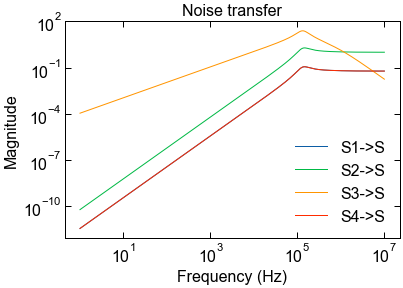

In [3]:
pll.plot_noise_transfer()

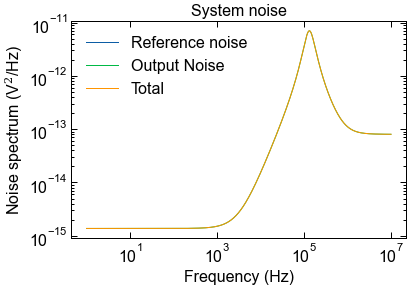

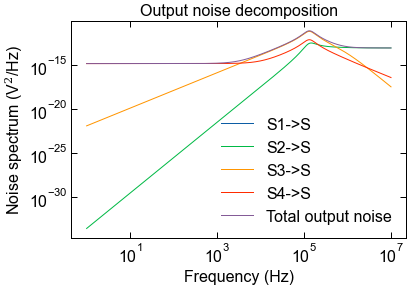

In [4]:
pll.plot_noise()